<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/lession_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.tabular import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
dev_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing,Categorify,Normalize]

test = TabularList.from_df(df.iloc[800:1000].copy(),path=path,cat_names=cat_names,cont_names=cont_names)

In [0]:
data = (TabularList.from_df(df,path=path,cat_names=cat_names,cont_names=cont_names,procs=procs)
                    .split_by_idx(list(range(800,1000)))
                    .label_from_df(cols=dev_var)
                    .add_test(test,label=0)
                    .databunch())

In [10]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,False,1.8627,-0.0361,1.9245,>=50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,-0.7760,0.0649,-0.4224,<50k
Federal-gov,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,False,1.8627,-0.2635,-0.4224,<50k
Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,False,1.4229,-0.4493,1.1422,<50k
Self-emp-inc,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,False,1.3496,-1.4790,1.1422,>=50k


In [0]:
learn = tabular_learner(data,layers=[200,100],metrics=accuracy)

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


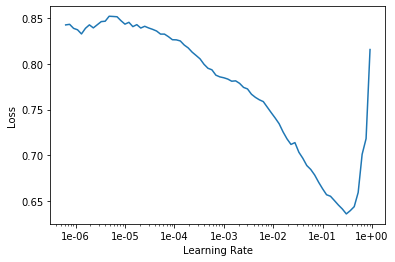

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.355389,0.378155,0.815000,00:04
